In [1]:
# Standard library imports
from datetime import datetime, timedelta

# Third-party library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import yfinance as yf

# Scikit-learn imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

/var/folders/ff/wvby4kh52j96myw15h33jjk40000gn/T/ipykernel_10156/3229613841.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/Users/I748920/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
from scripts.get_top_stocks import *
# top_stocks_long, top_stocks_long_short = generate_top_stocks_df()
# common_top_stocks = get_common_top_stocks(top_stocks_long, top_stocks_long_short)
common_top_stocks = pd.read_csv('stock_selection/top_30_stocks.csv')
common_top_stocks = set(common_top_stocks['Ticker'].tolist())

# specify variables for dataset generation
start_date = '2023-01-01'
end_date = '2024-08-01'
interval = "1h"
trading_days_per_year = 252
hours_per_day = 6.5

In [5]:
from scripts.generate_dataset_features import *


df = get_all_stock_features_df(
    stocks_list=common_top_stocks,
    start_date=start_date,
    end_date=end_date,
    interval=interval,
    trading_days_per_year=trading_days_per_year, 
    hours_per_day=hours_per_day)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [9]:
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,EMACloseDiff256,SMACloseDiff256,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift,stock_name
0,2023-02-24 13:30:00-05:00,76.599998,76.860001,76.340103,76.565002,76.565002,239470,-0.000718,-0.044901,0.147186,...,0.015457,0.015259,-0.000868,6.580791,0.636361,1.051645,-0.480103,-1.09,0.001370,DDOG
1,2023-02-24 14:30:00-05:00,76.570000,77.010002,76.450104,76.669998,76.669998,225194,0.001370,-0.036419,-0.030723,...,0.016716,0.016404,0.000356,6.577679,0.635653,1.065453,-0.440102,-1.09,0.000000,DDOG
2,2023-02-24 15:30:00-05:00,76.680000,76.779999,76.169998,76.669998,76.669998,644515,0.000000,0.269784,0.482139,...,0.016584,0.016093,0.000218,6.571583,0.634175,1.083522,-0.389999,-1.09,0.016749,DDOG
3,2023-02-27 09:30:00-05:00,77.750000,78.800003,76.589996,77.964996,77.964996,468767,0.016749,-0.026857,-0.157865,...,0.033483,0.032907,0.016978,6.568624,0.635095,1.091183,1.210007,0.31,0.001858,DDOG
4,2023-02-27 10:30:00-05:00,77.930000,78.129997,77.379997,78.110001,78.110001,288736,0.001858,-0.182187,-0.237664,...,0.035120,0.034481,0.018732,6.566222,0.635081,1.090389,-0.250000,0.31,-0.004555,DDOG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,2024-07-31 10:30:00-04:00,702.039978,708.239990,693.450012,698.809998,698.809998,652512,-0.005494,-0.265468,-0.475101,...,-0.137036,-0.153691,-0.167545,69.182032,0.664889,0.911368,13.789978,0.68,0.001073,SMCI
2499,2024-07-31 11:30:00-04:00,699.250000,704.000000,693.419128,699.559998,699.559998,470255,0.001073,-0.228604,-0.162328,...,-0.135194,-0.152481,-0.166607,69.557995,0.664335,0.902885,9.580872,0.68,-0.001194,SMCI
2500,2024-07-31 12:30:00-04:00,699.080017,703.859985,696.409973,698.724976,698.724976,450874,-0.001194,-0.105032,-0.021040,...,-0.135309,-0.153187,-0.167469,69.936708,0.664337,0.901761,6.450012,0.68,-0.000301,SMCI
2501,2024-07-31 13:30:00-04:00,698.705017,699.593994,692.260010,698.515015,698.515015,305454,-0.000301,-0.177926,-0.192271,...,-0.134656,-0.153115,-0.167626,70.327022,0.664104,0.895624,6.333984,0.68,-0.007503,SMCI


In [11]:
def categorize_by_percentile(values,percentile_list,labels):
    # Compute percentiles
    percentiles = np.percentile(values, percentile_list)
    # Use pd.cut to bin the values
    categories = pd.cut(values, bins=[-np.inf] + percentiles.tolist() + [np.inf], labels=labels, include_lowest=True)
    
    return categories

def add_target_cols(df,percentile_list,labels):
    new_df = pd.DataFrame()
    
    for stock_name in df.stock_name.unique():
        stock_df = df[df['stock_name']==stock_name]
        stock_df["Stock_Position"] = categorize_by_percentile(stock_df["Log_Return_shift"].to_numpy(),percentile_list,labels)        
        label_mapping = {labels[i]:i for i in range(len(labels))}
        stock_df["Target"] = stock_df["Stock_Position"].apply(lambda x:label_mapping[x])
        new_df = pd.concat([new_df,stock_df],ignore_index=True)
    
    return new_df

In [13]:
# create target column

percentile_list = [33,66]
# labels = ['strong sell', 'sell', 'hold', 'buy', 'strong buy']
labels = ['sell', 'hold', 'buy']

df = add_target_cols(df,percentile_list,labels)

/var/folders/ff/wvby4kh52j96myw15h33jjk40000gn/T/ipykernel_10156/3840593447.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df["Stock_Position"] = categorize_by_percentile(stock_df["Log_Return_shift"].to_numpy(),percentile_list,labels)
/var/folders/ff/wvby4kh52j96myw15h33jjk40000gn/T/ipykernel_10156/3840593447.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df["Target"] = stock_df["Stock_Position"].apply(lambda x:label_mapping[x])
/var/folders/ff/wvby4kh52j96myw15h33jjk40000gn/T/ipyker

In [15]:
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift,stock_name,Stock_Position,Target
0,2023-02-24 13:30:00-05:00,76.599998,76.860001,76.340103,76.565002,76.565002,239470,-0.000718,-0.044901,0.147186,...,-0.000868,6.580791,0.636361,1.051645,-0.480103,-1.09,0.001370,DDOG,hold,1
1,2023-02-24 14:30:00-05:00,76.570000,77.010002,76.450104,76.669998,76.669998,225194,0.001370,-0.036419,-0.030723,...,0.000356,6.577679,0.635653,1.065453,-0.440102,-1.09,0.000000,DDOG,hold,1
2,2023-02-24 15:30:00-05:00,76.680000,76.779999,76.169998,76.669998,76.669998,644515,0.000000,0.269784,0.482139,...,0.000218,6.571583,0.634175,1.083522,-0.389999,-1.09,0.016749,DDOG,buy,2
3,2023-02-27 09:30:00-05:00,77.750000,78.800003,76.589996,77.964996,77.964996,468767,0.016749,-0.026857,-0.157865,...,0.016978,6.568624,0.635095,1.091183,1.210007,0.31,0.001858,DDOG,hold,1
4,2023-02-27 10:30:00-05:00,77.930000,78.129997,77.379997,78.110001,78.110001,288736,0.001858,-0.182187,-0.237664,...,0.018732,6.566222,0.635081,1.090389,-0.250000,0.31,-0.004555,DDOG,sell,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76726,2024-07-31 10:30:00-04:00,702.039978,708.239990,693.450012,698.809998,698.809998,652512,-0.005494,-0.265468,-0.475101,...,-0.167545,69.182032,0.664889,0.911368,13.789978,0.68,0.001073,SMCI,hold,1
76727,2024-07-31 11:30:00-04:00,699.250000,704.000000,693.419128,699.559998,699.559998,470255,0.001073,-0.228604,-0.162328,...,-0.166607,69.557995,0.664335,0.902885,9.580872,0.68,-0.001194,SMCI,hold,1
76728,2024-07-31 12:30:00-04:00,699.080017,703.859985,696.409973,698.724976,698.724976,450874,-0.001194,-0.105032,-0.021040,...,-0.167469,69.936708,0.664337,0.901761,6.450012,0.68,-0.000301,SMCI,hold,1
76729,2024-07-31 13:30:00-04:00,698.705017,699.593994,692.260010,698.515015,698.515015,305454,-0.000301,-0.177926,-0.192271,...,-0.167626,70.327022,0.664104,0.895624,6.333984,0.68,-0.007503,SMCI,sell,0


In [17]:
df.Target.value_counts()

Target
2    26088
0    25322
1    25321
Name: count, dtype: int64

In [19]:
# additional logic to ensure buy remains +ve and sell remainvs -ve

print(len(df[(df.Log_Return_shift < 0) & (df.Stock_Position == 'buy')]))
# print(len(df[(df.Log_Return_shift < 0) & (df.Stock_Position == 'strong buy')]))

print(len(df[(df.Log_Return_shift > 0) & (df.Stock_Position == 'sell')]))
# print(len(df[(df.Log_Return_shift > 0) & (df.Stock_Position == 'strong sell')]))

# all good

0
0


In [21]:
df.columns

Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Log_Return', 'EMAVolumeDiff2', 'SMAVolumeDiff2', 'EMACloseDiff2',
       'SMACloseDiff2', 'VWAP2', 'VolatilityStdDev2', 'Volatility2',
       'Momentum2', 'EMAVolumeDiff4', 'SMAVolumeDiff4', 'EMACloseDiff4',
       'SMACloseDiff4', 'VWAP4', 'VolatilityStdDev4', 'Volatility4',
       'Momentum4', 'EMAVolumeDiff8', 'SMAVolumeDiff8', 'EMACloseDiff8',
       'SMACloseDiff8', 'VWAP8', 'VolatilityStdDev8', 'Volatility8',
       'Momentum8', 'EMAVolumeDiff16', 'SMAVolumeDiff16', 'EMACloseDiff16',
       'SMACloseDiff16', 'VWAP16', 'VolatilityStdDev16', 'Volatility16',
       'Momentum16', 'EMAVolumeDiff32', 'SMAVolumeDiff32', 'EMACloseDiff32',
       'SMACloseDiff32', 'VWAP32', 'VolatilityStdDev32', 'Volatility32',
       'Momentum32', 'EMAVolumeDiff64', 'SMAVolumeDiff64', 'EMACloseDiff64',
       'SMACloseDiff64', 'VWAP64', 'VolatilityStdDev64', 'Volatility64',
       'Momentum64', 'EMAVolumeDiff128', 'SMAVolum

In [23]:
# sort df according to date
df1 = df.sort_values("Datetime").reset_index(drop=True)

# train test split on index
train_size, val_size, test_size = 0.8, 0.1, 0.1
train_size, val_size, test_size = int(len(df1) * train_size), int(len(df1) * val_size), int(len(df1) * test_size)
train_df = df1.iloc[:train_size]
val_df = df1.iloc[train_size:train_size + val_size]
test_df = df1.iloc[train_size + val_size:]

train_df.shape,val_df.shape,test_df.shape

((61384, 78), (7673, 78), (7674, 78))

In [25]:
test_df.Target.value_counts()

Target
0    2655
2    2603
1    2416
Name: count, dtype: int64

In [27]:
df.columns, df.columns[8:-4]

(Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
        'Log_Return', 'EMAVolumeDiff2', 'SMAVolumeDiff2', 'EMACloseDiff2',
        'SMACloseDiff2', 'VWAP2', 'VolatilityStdDev2', 'Volatility2',
        'Momentum2', 'EMAVolumeDiff4', 'SMAVolumeDiff4', 'EMACloseDiff4',
        'SMACloseDiff4', 'VWAP4', 'VolatilityStdDev4', 'Volatility4',
        'Momentum4', 'EMAVolumeDiff8', 'SMAVolumeDiff8', 'EMACloseDiff8',
        'SMACloseDiff8', 'VWAP8', 'VolatilityStdDev8', 'Volatility8',
        'Momentum8', 'EMAVolumeDiff16', 'SMAVolumeDiff16', 'EMACloseDiff16',
        'SMACloseDiff16', 'VWAP16', 'VolatilityStdDev16', 'Volatility16',
        'Momentum16', 'EMAVolumeDiff32', 'SMAVolumeDiff32', 'EMACloseDiff32',
        'SMACloseDiff32', 'VWAP32', 'VolatilityStdDev32', 'Volatility32',
        'Momentum32', 'EMAVolumeDiff64', 'SMAVolumeDiff64', 'EMACloseDiff64',
        'SMACloseDiff64', 'VWAP64', 'VolatilityStdDev64', 'Volatility64',
        'Momentum64', 'EMAVolumeDiff1

In [29]:
features = df.columns[8:-4]
print(len(features))
target = "Target"

X_train = train_df[features].to_numpy()
y_train = train_df[target].to_numpy()
print(X_train.shape,y_train.shape)

X_val = val_df[features].to_numpy()
y_val = val_df[target].to_numpy()
print(X_val.shape,y_val.shape)

X_test = test_df[features].to_numpy()
y_test = test_df[target].to_numpy()
print(X_test.shape,y_test.shape)

66
(61384, 66) (61384,)
(7673, 66) (7673,)
(7674, 66) (7674,)


In [31]:
# check number of classes in target is correct

set(y_train),set(y_val),set(y_test)

({0, 1, 2}, {0, 1, 2}, {0, 1, 2})

In [33]:
# using PCA

from scripts.train_predict import *

# standardise the values and selectKbest
scaler = StandardScaler()
pca = PCA(n_components = 0.95)

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)
X_train = pca.fit_transform(X_train)

# Transform the validation data
X_val = scaler.transform(X_val)
X_val = pca.transform(X_val)

# Transform the test data
X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((61384, 18), (61384,), (7673, 18), (7673,), (7674, 18), (7674,))

In [35]:
X_train[0],y_train[0]

(array([-4.40052952, -0.2130635 , -0.54140228, -1.28775231, -1.01123124,
        -0.53299612,  0.57883568, -0.43235488,  0.69752309,  0.38558991,
         0.53412625, -0.24433789, -0.36328406,  0.16719089,  0.19747429,
        -0.49201734, -0.08920142, -0.22533974]),
 2)

In [37]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import ParameterGrid
# from tqdm import tqdm
from alive_progress import alive_it

def train():
    # initialise training params
    best_score = float('inf')
    best_params = None
    best_model = None
    

    # Define the parameter grid
    param_grid = {
        'eta': [0.1, 0.3, 0.5],
        'gamma': [0, ],
        'max_depth': [6, 8],
    }

    for params in alive_it(ParameterGrid(param_grid)):
        model = xgb.XGBClassifier(**params) # initialise new model before each run
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        score = accuracy_score(y_val, y_pred)
        
        if score < best_score:
            best_score = score
            best_params = params
            best_model = model
            print(f"score: {round(best_score,7)}")
            # print(f"score: {round(best_score,7)}, params: {best_params}")

    print(f"Best parameters found: {best_params}")
    print(f"Best validation score: {round(best_score,5)}")

    return best_model, best_params, best_score, X_test, y_test

def predict(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"Test set accuracy score: {round(score,5)}")
    
    return y_pred

def train_predict():
    best_model, best_params, best_score, X_test, y_test = train()
    y_pred = predict(best_model, X_test, y_test)
    acc = accuracy_score(y_test, y_pred)
 
    
    return best_model, best_params, best_score, acc, y_pred
    

In [39]:
best_model, best_params, best_score, acc, y_pred = train_predict()

on 0: score: 0.4001043
on 1: score: 0.3888961
on 2: score: 0.3793822
on 3: score: 0.3791216
on 5: score: 0.3702594
|████████████████████████████████████████| 6/6 [100%] in 5.2s (1.16/s) 
Best parameters found: {'eta': 0.5, 'gamma': 0, 'max_depth': 8}
Best validation score: 0.37026
Test set accuracy score: 0.35822


accuracy: 35.82


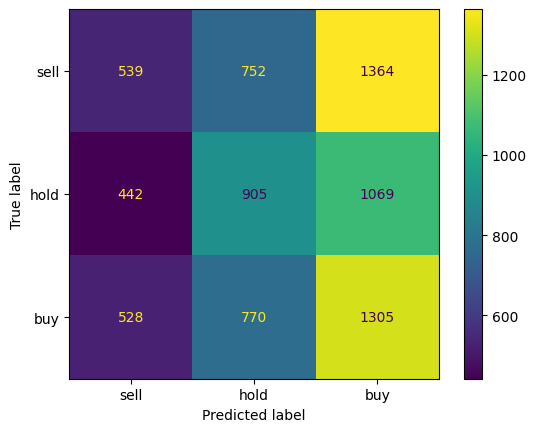

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(f"accuracy: {round(acc*100,2)}")
labels = ['sell', 'hold', 'buy']
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()
plt.show()

In [41]:
## predict on indiv stocks
## pca transformed features only

for stock_name in test_df.stock_name.unique():
    stock_df = test_df[test_df['stock_name']==stock_name]
    stock_X_test = stock_df[features].to_numpy()
    stock_y_test = stock_df[target].to_numpy()
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_X_test = pca.transform(stock_X_test)
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_preds = best_model.predict(stock_X_test)
    acc = accuracy_score(stock_y_test, stock_preds)

    print(f"{stock_name}: {round(acc*100,2)}")

META: 30.4
NVDA: 33.2
TSLA: 30.4
AMZN: 34.0
AVGO: 38.8
PDD: 37.6
DDOG: 32.4
MU: 39.2
ADBE: 36.0
MRVL: 33.2
MDB: 32.0
ZS: 34.0
DASH: 32.8
TTD: 38.8
SNPS: 34.8
AMD: 36.4
PANW: 36.4
WDAY: 34.0
CDNS: 37.6
SMCI: 29.2
NFLX: 32.13
LRCX: 34.54
CRWD: 38.15
BKNG: 31.33
MELI: 27.31
INTC: 41.77
AMAT: 36.14
TEAM: 38.96
MKS.L: 31.67
RR.L: 37.54


# last pnl

In [46]:
# best_model_path = 'fcn-best.pt'
# model = FCN(
#     num_features=20,
#     num_classes=3
# )
# model.load_state_dict(torch.load(best_model_path,map_location=device))
# model.eval()

In [50]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.5, eval_metric=None,
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [52]:
df=pd.read_csv("temp.csv")

In [54]:
import pandas as pd
from datetime import datetime

# Convert the datetime column to datetime objects
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Define the date threshold (July 1, 2024)
date_threshold = datetime.strptime('2024-07-01 00:00:00-00:00', '%Y-%m-%d %H:%M:%S%z')

# Filter the DataFrame for dates after July 1, 2024
test_df = df[df['Datetime'] > date_threshold]

# Print the filtered DataFrame
test_df

/var/folders/ff/wvby4kh52j96myw15h33jjk40000gn/T/ipykernel_10156/254771661.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Datetime'] = pd.to_datetime(df['Datetime'])


,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,EMACloseDiff256,SMACloseDiff256,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift,stock_name
2354,2024-07-01 09:30:00-04:00,30.910000,31.020000,30.615000,30.789499,30.789499,6793245,-0.005199,0.077893,0.003811,...,-0.021866,0.001200,0.001299,0.541269,0.247473,0.990494,-0.594999,0.68,0.002611,INTC
2355,2024-07-01 10:30:00-04:00,30.786900,30.870001,30.700001,30.870001,30.870001,3242517,0.002611,-0.239284,-0.353808,...,-0.019161,0.003826,0.003921,0.541198,0.247262,0.997899,-0.830000,0.68,-0.001297,INTC
2356,2024-07-01 11:30:00-04:00,30.860001,30.950001,30.799999,30.830000,30.830000,2365949,-0.001297,-0.210855,-0.156294,...,-0.020276,0.002518,0.002618,0.541218,0.246930,1.001820,-0.849998,0.68,-0.002598,INTC
2357,2024-07-01 12:30:00-04:00,30.825001,30.825001,30.665001,30.750000,30.750000,1907661,-0.002598,-0.160045,-0.107237,...,-0.022645,-0.000095,-0.000004,0.541184,0.246822,1.003099,-0.840000,0.68,0.001300,INTC
2358,2024-07-01 13:30:00-04:00,30.750000,30.850000,30.680000,30.790001,30.790001,2027832,0.001300,-0.038458,0.030535,...,-0.021210,0.001094,0.000975,0.538606,0.238828,1.029370,-0.830000,0.68,0.000649,INTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76726,2024-07-31 10:30:00-04:00,473.820007,475.260010,471.769989,473.769989,473.769989,1751198,0.000148,-0.161092,-0.342124,...,-0.029712,-0.048297,-0.043341,20.204107,0.301629,0.945743,2.490021,0.68,-0.001162,META
76727,2024-07-31 11:30:00-04:00,473.730011,475.000000,472.880005,473.220001,473.220001,1342196,-0.001162,-0.156181,-0.132218,...,-0.030606,-0.049226,-0.044301,20.262393,0.300908,0.952690,1.119995,0.68,-0.002506,META
76728,2024-07-31 12:30:00-04:00,473.119995,475.929993,471.220001,472.035400,472.035400,1547612,-0.002506,-0.009179,0.071083,...,-0.032784,-0.051425,-0.046520,20.325751,0.300964,0.950867,3.709991,0.68,0.001407,META
76729,2024-07-31 13:30:00-04:00,472.059998,473.970001,469.420013,472.700012,472.700012,1553672,0.001407,-0.001773,0.001954,...,-0.031185,-0.049895,-0.045002,20.385228,0.300744,0.947828,3.549988,0.68,-0.001440,META


In [55]:
stock_list =[
    "DDOG",
    "SNPS",
    "BKNG",
    "SMCI",
    "MDB",
    "NVDA",
    "MELI",
    "WDAY",
    # "RR.L",
    "MU",
    "PDD",
]

test_df = test_df[test_df.stock_name.isin(stock_list)]
test_df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,EMACloseDiff256,SMACloseDiff256,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift,stock_name
4857,2024-07-01 09:30:00-04:00,133.350006,133.550003,131.529999,131.820007,131.820007,1262273,-0.008235,0.130380,0.164205,...,-0.066539,-0.088739,-0.100332,5.896215,0.388633,0.955494,1.020004,0.68,0.001630,PDD
4858,2024-07-01 10:30:00-04:00,131.820007,132.169998,130.050003,132.035004,132.035004,1509205,0.001630,0.094925,0.089098,...,-0.064543,-0.087123,-0.098545,5.931056,0.388483,0.961653,1.119995,0.68,0.004647,PDD
4859,2024-07-01 11:30:00-04:00,132.035004,133.050003,131.919998,132.649994,132.649994,476763,0.004647,-0.386639,-0.519868,...,-0.059745,-0.082754,-0.094279,5.961136,0.388666,0.965429,0.130005,0.68,0.000302,PDD
4860,2024-07-01 12:30:00-04:00,132.660004,133.059998,132.520004,132.690002,132.690002,272799,0.000302,-0.381359,-0.272111,...,-0.059026,-0.082354,-0.094022,5.991852,0.388636,0.963967,-0.460007,0.68,0.000678,PDD
4861,2024-07-01 13:30:00-04:00,132.679993,132.970001,132.410004,132.779999,132.779999,213691,0.000678,-0.261732,-0.121499,...,-0.057960,-0.081568,-0.093603,6.028412,0.387346,0.952784,-0.440002,0.68,-0.001281,PDD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69217,2024-07-31 10:30:00-04:00,114.129997,115.889999,114.050003,115.739998,115.739998,54324447,0.014256,-0.253971,-0.449407,...,-0.022383,-0.065304,-0.063027,6.630986,0.571675,0.955826,0.839996,0.68,-0.002763,NVDA
69218,2024-07-31 11:30:00-04:00,115.730003,116.470001,115.410004,115.420601,115.420601,41236682,-0.002763,-0.203369,-0.136957,...,-0.024890,-0.067735,-0.065380,6.648481,0.571571,0.958146,0.059998,0.68,0.000861,NVDA
69219,2024-07-31 12:30:00-04:00,115.430000,116.029999,114.739998,115.519997,115.519997,31361626,0.000861,-0.178205,-0.136023,...,-0.023868,-0.066808,-0.064402,6.663786,0.571376,0.964862,0.290001,0.68,0.006213,NVDA
69220,2024-07-31 13:30:00-04:00,115.529999,116.430000,114.250000,116.239998,116.239998,37471590,0.006213,-0.006107,0.088765,...,-0.017648,-0.060887,-0.058384,6.675801,0.571601,0.970450,1.180000,0.68,-0.001420,NVDA


In [62]:
def model_to_portfolio(test_df, features, target, model):
    
    res = pd.DataFrame()
    for ticker in test_df.stock_name.unique():
        stock_df = test_df[test_df['stock_name']==ticker]
        stock_X_test = stock_df[features].to_numpy()

        stock_X_test = scaler.transform(stock_X_test)
        stock_X_test = pca.transform(stock_X_test)
        stock_X_test = torch.tensor(stock_X_test, dtype=torch.float32)
        stock_preds = model.predict(stock_X_test)

        # _, class_preds = torch.max(stock_preds, dim=1)
        # class_preds = class_preds.detach().numpy()
        res[ticker] = pd.Series(stock_preds)
        # print(len(stock_X_test))
        
    res = res.replace({0:-1, 1:0, 2:1})
    res['Date'] = test_df.Datetime.unique()
    res = res.set_index('Date')
    res = res.astype('int16')
    res['total'] = res.apply(lambda x: np.sum(np.abs(x)), axis=1)
    res = res.div(res['total'], axis=0)
    res.drop(columns=['total'], inplace=True)

    return res


res = model_to_portfolio(test_df, features, target, model=best_model)

In [64]:
res

,PDD,SMCI,MU,BKNG,WDAY,MELI,MDB,SNPS,DDOG,NVDA
Date,,,,,,,,,,
2024-07-01 09:30:00-04:00,0.125000,0.125000,0.125000,0.125000,0.000000,0.125000,-0.125000,0.125000,0.000000,-0.125000
2024-07-01 10:30:00-04:00,0.142857,-0.142857,-0.142857,0.000000,0.142857,-0.142857,-0.142857,0.000000,0.000000,0.142857
2024-07-01 11:30:00-04:00,0.000000,-0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333
2024-07-01 12:30:00-04:00,0.000000,0.166667,0.000000,0.166667,0.000000,-0.166667,-0.166667,-0.166667,0.000000,0.166667
2024-07-01 13:30:00-04:00,0.000000,-0.166667,0.000000,0.166667,0.166667,0.166667,-0.166667,0.000000,0.000000,0.166667
...,...,...,...,...,...,...,...,...,...,...
2024-07-31 10:30:00-04:00,-0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,-0.250000,0.000000
2024-07-31 11:30:00-04:00,-0.125000,-0.125000,-0.125000,-0.125000,0.125000,0.125000,0.125000,0.000000,0.000000,-0.125000
2024-07-31 12:30:00-04:00,0.000000,0.142857,-0.142857,0.000000,0.142857,-0.142857,0.000000,0.142857,0.142857,-0.142857


In [66]:
res.to_csv("xgboost-best-haidi.csv")